In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as smf
import linearmodels as lm

from linearmodels.panel import PooledOLS
from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects
from linearmodels.panel import compare
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', 500)


%matplotlib inline

In [2]:
#df = pd.read_csv('D:/TNC-Demand-Model/Outputs/Chi_Estimation_File.csv',usecols = ['ORIGIN','DESTINATION','MONTH','YEAR','TRIPS_SUPPRESSED','TRIPS_UNSUPPRESSED','TRAVEL_TIME_MINUTES','DISTANCE','FARE','TOTAL_POP','TOTAL_HHLDS','HHLDS_MEAN_INCOME','HHLDS_0_VEH','AVG_VEH_PER_HHLD','TOTAL_POP_DESTINATION','MEDIAN_AGE_DESTINATION','MEDIAN_AGE','TOTAL_HHLDS_DESTINATION','HHLDS_MEAN_INCOME_DESTINATION','HHLDS_0_VEH_DESTINATION','AVG_VEH_PER_HHLD_DESTINATION','travel_time','PRIVATE_TAX','SHARED_TAX','TOTAL_JOBS_ORIGIN','TOTAL_JOBS_DESTINATION','TOTAL_WORKERS_ORIGIN','TOTAL_WORKERS_DESTINATION'])

In [2]:
df = pd.read_csv('D:/TNC-Demand-Model/Outputs/Chi_Estimation_File.csv')

In [14]:
for col in df.columns:
    print(col)

YEAR
MONTH
ORIGIN
DESTINATION
Pickup Census Tract
Dropoff Census Tract
Trip Seconds_PRIVATE
Trip Miles_PRIVATE
Fare_PRIVATE
Tip_PRIVATE
Additional Charges_PRIVATE
Trip Total_PRIVATE
TRIPS_PRIVATE
Trips Pooled_PRIVATE
TRAVEL_TIME_MINUTES_PRIVATE
SPEED_PRIVATE
Trip Seconds_SHARED
Trip Miles_SHARED
Fare_SHARED
Tip_SHARED
Additional Charges_SHARED
Trip Total_SHARED
TRIPS_SHARED
Trips Pooled_SHARED
TRAVEL_TIME_MINUTES_SHARED
SPEED_SHARED
GEOID_PICKUP
GEOID_DROPOFF
Pickup Community Area
Dropoff Community Area
TRIPS_SHARED_UNSUPPRESSED
TRIPS_PRIVATE_UNSUPPRESSED
TRIPS_PRIVATE_SUPPRESSED
TRIPS_SHARED_SUPPRESSED
TRAVEL_TIME_MINUTES_UNSUPPRESSED
TRAVEL_TIME_MINUTES_SUPPRESSED
DISTANCE_UNSUPPRESSED
DISTANCE_SUPPRESSED
FARE_UNSUPPRESSED
FARE_SUPPRESSED
TIP_UNSUPPRESSED
TIP_SUPPRESSED
TAX_AND_SURGE_UNSUPPRESSED
TAX_AND_SURGE_SUPPRESSED
TOTAL_COST_UNSUPPRESSED
TOTAL_COST_SUPPRESSED
TRIPS_POOLED_UNSUPPRESSED
TRIPS_POOLED_SUPPRESSED
TRIPS_SUPPRESSED
TRIPS_UNSUPPRESSED
TRIPS_ALL
TRAVEL_TIME_MINUTES
DIS

In [5]:
#df = df.drop(['Unnamed: 0','Unnamed: 0_RAC_ORIGIN','Unnamed: 0_x','TOD','DAY_PRIVATE','DAY_SHARED','Unnamed: 0_y','DAY','Unnamed: 0_RAC_DESTINATION','Unnamed: 0_WAC_ORIGIN','Unnamed: 0_WAC_DESTINATION','Unnamed: 0.1'], axis = 1)

In [3]:
df[np.isnan(df['TRIPS_PRIVATE'])]

,Unnamed: 0,Unnamed: 0.1,ORIGIN,DESTINATION,YEAR,MONTH,Pickup Census Tract,Dropoff Census Tract,Trip Seconds_PRIVATE,Trip Miles_PRIVATE,Fare_PRIVATE,Tip_PRIVATE,Additional Charges_PRIVATE,Trip Total_PRIVATE,TRIPS_PRIVATE,Trips Pooled_PRIVATE,TRAVEL_TIME_MINUTES_PRIVATE,SPEED_PRIVATE,Trip Seconds_SHARED,Trip Miles_SHARED,Fare_SHARED,Tip_SHARED,Additional Charges_SHARED,Trip Total_SHARED,TRIPS_SHARED,Trips Pooled_SHARED,TRAVEL_TIME_MINUTES_SHARED,SPEED_SHARED,Unnamed: 0_y,GEOID_PICKUP,GEOID_DROPOFF,TRIPS_SHARED_UNSUPPRESSED,TRIPS_PRIVATE_UNSUPPRESSED,TRIPS_PRIVATE_SUPPRESSED,TRIPS_SHARED_SUPPRESSED,TRAVEL_TIME_MINUTES_UNSUPPRESSED,TRAVEL_TIME_MINUTES_SUPPRESSED,DISTANCE_UNSUPPRESSED,DISTANCE_SUPPRESSED,FARE_UNSUPPRESSED,FARE_SUPPRESSED,TIP_UNSUPPRESSED,TIP_SUPPRESSED,TAX_AND_SURGE_UNSUPPRESSED,TAX_AND_SURGE_SUPPRESSED,TOTAL_COST_UNSUPPRESSED,TOTAL_COST_SUPPRESSED,TRIPS_POOLED_UNSUPPRESSED,TRIPS_POOLED_SUPPRESSED,TRIPS_SUPPRESSED,TRIPS_UNSUPPRESSED,TRIPS_ALL,TRAVEL_TIME_MINUTES,DISTANCE,FARE,TIP,TAX_AND_SURGE,TOTAL_COST,TRIPS_POOLED,TOTAL_POP,TOTAL_MALE,TOTAL_FEMALE,AGE_5U,AGE_5_9,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_59,AGE_60_64,AGE_65_74,AGE_75_84,AGE_85P,MEDIAN_AGE,TOTAL_HHLDS,AVG_HHLD_SIZE,AVG_FAMILY_SIZE,TOTAL_POP_18_24,TOTAL_POP_18_24_NO_HIGH_SCHOOL,TOTAL_POP_18_24_HIGH_SCHOOL,TOTAL_POP_18_24_SOME_COLLEGE,TOTAL_POP_18_24_SOME_BACHELORS_HIGHER,TOTAL_POP_25P,TOTAL_POP_25P_LESS_THAN_9TH,TOTAL_POP_25P_9TH_TO_12TH,TOTAL_POP_25P_HIGH_SCHOOL,TOTAL_POP_25P_SOME_COLLEGE,TOTAL_POP_25P_ASSOCIATES,TOTAL_POP_25P_BACHELORS,TOTAL_POP_25P_GRADUATE,TOTAL_POP_25P_HIGH_SCHOOL_HIGHER,TOTAL_POP_25P_BACHELORS_HIGHER,TOTAL_HHLDS_LESS_10K,TOTAL_HHLDS_10K_15K,TOTAL_HHLDS_15K_25K,TOTAL_HHLDS_25K_35K,TOTAL_HHLDS_35K_50K,TOTAL_HHLDS_50K_75K,TOTAL_HHLDS_75K_100K,TOTAL_HHLDS_100K_150K,TOTAL_HHLDS_150K_200K,TOTAL_HHLDS_200KP,HHLDS_MEDIAN_INCOME,HHLDS_MEAN_INCOME,HHLDS_0_VEH,HHLDS_1_VEH,HHLDS_2_VEH,HHLDS_3P_VEH,AVG_VEH_PER_HHLD,TOTAL_POP_DESTINATION,TOTAL_MALE_DESTINATION,TOTAL_FEMALE_DESTINATION,AGE_5U_DESTINATION,AGE_5_9_DESTINATION,AGE_10_14_DESTINATION,AGE_15_19_DESTINATION,AGE_20_24_DESTINATION,AGE_25_34_DESTINATION,AGE_35_44_DESTINATION,AGE_45_54_DESTINATION,AGE_55_59_DESTINATION,AGE_60_64_DESTINATION,AGE_65_74_DESTINATION,AGE_75_84_DESTINATION,AGE_85P_DESTINATION,MEDIAN_AGE_DESTINATION,TOTAL_HHLDS_DESTINATION,AVG_HHLD_SIZE_DESTINATION,AVG_FAMILY_SIZE_DESTINATION,TOTAL_POP_18_24_DESTINATION,TOTAL_POP_18_24_NO_HIGH_SCHOOL_DESTINATION,TOTAL_POP_18_24_HIGH_SCHOOL_DESTINATION,TOTAL_POP_18_24_SOME_COLLEGE_DESTINATION,TOTAL_POP_18_24_SOME_BACHELORS_HIGHER_DESTINATION,TOTAL_POP_25P_DESTINATION,TOTAL_POP_25P_LESS_THAN_9TH_DESTINATION,TOTAL_POP_25P_9TH_TO_12TH_DESTINATION,TOTAL_POP_25P_HIGH_SCHOOL_DESTINATION,TOTAL_POP_25P_SOME_COLLEGE_DESTINATION,TOTAL_POP_25P_ASSOCIATES_DESTINATION,TOTAL_POP_25P_BACHELORS_DESTINATION,TOTAL_POP_25P_GRADUATE_DESTINATION,TOTAL_POP_25P_HIGH_SCHOOL_HIGHER_DESTINATION,TOTAL_POP_25P_BACHELORS_HIGHER_DESTINATION,TOTAL_HHLDS_LESS_10K_DESTINATION,TOTAL_HHLDS_10K_15K_DESTINATION,TOTAL_HHLDS_15K_25K_DESTINATION,TOTAL_HHLDS_25K_35K_DESTINATION,TOTAL_HHLDS_35K_50K_DESTINATION,TOTAL_HHLDS_50K_75K_DESTINATION,TOTAL_HHLDS_75K_100K_DESTINATION,TOTAL_HHLDS_100K_150K_DESTINATION,TOTAL_HHLDS_150K_200K_DESTINATION,TOTAL_HHLDS_200KP_DESTINATION,HHLDS_MEDIAN_INCOME_DESTINATION,HHLDS_MEAN_INCOME_DESTINATION,HHLDS_0_VEH_DESTINATION,HHLDS_1_VEH_DESTINATION,HHLDS_2_VEH_DESTINATION,HHLDS_3P_VEH_DESTINATION,AVG_VEH_PER_HHLD_DESTINATION,SI01,SI02,SI03,CNS01_RAC_ORIGIN,CNS02_RAC_ORIGIN,CNS03_RAC_ORIGIN,CNS04_RAC_ORIGIN,CNS05_RAC_ORIGIN,CNS06_RAC_ORIGIN,CNS07_RAC_ORIGIN,CNS08_RAC_ORIGIN,CNS09_RAC_ORIGIN,CNS10_RAC_ORIGIN,CNS11_RAC_ORIGIN,CNS12_RAC_ORIGIN,CNS13_RAC_ORIGIN,CNS14_RAC_ORIGIN,CNS15_RAC_ORIGIN,CNS16_RAC_ORIGIN,CNS17_RAC_ORIGIN,CNS18_RAC_ORIGIN,CNS19_RAC_ORIGIN,CNS20_RAC_ORIGIN,CNS01_RAC_DESTINATION,CNS02_RAC_DESTINATION,CNS03_RAC_DESTINATION,CNS04_RAC_DESTINATION,CNS05_RAC_DESTINATION,CNS06_RAC_DESTINATION,CNS07_RAC

In [6]:
df['TRIPS_PRIVATE'] = df['TRIPS_PRIVATE'].fillna(0)
df['TRIPS_SHARED'] = df['TRIPS_SHARED'].fillna(0)

In [6]:
df[['TRIPS_ALL','TRIPS_PRIVATE','TRIPS_SHARED','TRIPS_SUPPRESSED','TRIPS_UNSUPPRESSED','TRIPS_PRIVATE_SUPPRESSED','TRIPS_SHARED_SUPPRESSED','TRIPS_PRIVATE_UNSUPPRESSED','TRIPS_SHARED_UNSUPPRESSED']]

,TRIPS_ALL,TRIPS_PRIVATE,TRIPS_SHARED,TRIPS_SUPPRESSED,TRIPS_UNSUPPRESSED,TRIPS_PRIVATE_SUPPRESSED,TRIPS_SHARED_SUPPRESSED,TRIPS_PRIVATE_UNSUPPRESSED,TRIPS_SHARED_UNSUPPRESSED
0,3.087537,1.998320,1.089217,0.254204,2.833333,0.164987,0.089217,1.833333,1.000000
1,2.884825,1.607476,1.277349,0.265507,2.619318,0.169976,0.095531,1.437500,1.181818
2,2.827250,1.731101,1.096149,0.264750,2.562500,0.168601,0.096149,1.562500,1.000000
3,3.295150,1.769828,1.525322,0.266579,3.028571,0.169828,0.096751,1.600000,1.428571
4,3.011851,1.915936,1.095915,0.261851,2.750000,0.165936,0.095915,1.750000,1.000000
...,...,...,...,...,...,...,...,...,...
10265611,3.348619,2.348140,1.000478,0.015285,3.333333,0.014807,0.000478,2.333333,1.000000
10265612,NaN,1.009416,0.000000,0.014119,NaN,0.009416,0.004703,1.000000,NaN
10265613,2.397967,1.394489,1.003478,0.013351,2.384615,0.009874,0.003478,1.384615,1.000000
10265614,21.344758,19.726933,1.617825,0.029373,21.315385,0.026933,0.002441,19.700000,1.615385


In [7]:
df['TOTAL_HHLDS_200KP'] = df['TOTAL_HHLDS_200KP'].fillna(0)
df['TOTAL_HHLDS_200KP_DESTINATION'] = df['TOTAL_HHLDS_200KP_DESTINATION'].fillna(0)

In [8]:
df['TOTAL_WORKERS_OD'] = df.TOTAL_WORKERS_ORIGIN + df.TOTAL_WORKERS_DESTINATION
df['TOTAL_JOBS_OD'] = df.TOTAL_JOBS_ORIGIN + df.TOTAL_JOBS_DESTINATION
df['HHLDS_MEAN_INCOME_OD'] = (df.HHLDS_MEAN_INCOME + df.HHLDS_MEAN_INCOME_DESTINATION)/2
df['AVG_VEH_PER_HHLD_OD'] = (df.AVG_VEH_PER_HHLD + df.AVG_VEH_PER_HHLD_DESTINATION)/2
df['HHLDS_0_VEH_OD'] = (df.HHLDS_0_VEH + df.HHLDS_0_VEH_DESTINATION)/2
df['MEDIAN_AGE_OD'] = (df.MEDIAN_AGE + df.MEDIAN_AGE_DESTINATION)/2
df['TRIPS_SUPPRESSED'] = df['TRIPS_SUPPRESSED'].fillna(0)
df['TRIPS_UNSUPPRESSED'] = df['TRIPS_UNSUPPRESSED'].fillna(0)
df['TRIPS_ALL'] = df['TRIPS_ALL'].fillna(0)
df['TOTAL_POP_OD'] = df.TOTAL_POP + df.TOTAL_POP_DESTINATION

In [9]:
df['TOTAL_HHLDS_100K_PLUS'] = df['TOTAL_HHLDS_200KP']+df['TOTAL_HHLDS_100K_150K']+df['TOTAL_HHLDS_150K_200K']
df['TOTAL_HHLDS_100K_PLUS_DESTINATION'] = df['TOTAL_HHLDS_200KP_DESTINATION']+df['TOTAL_HHLDS_100K_150K_DESTINATION']+df['TOTAL_HHLDS_150K_200K_DESTINATION']

df['TOTAL_HHLDS_100K_PLUS_OD'] = df.TOTAL_HHLDS_100K_PLUS + df.TOTAL_HHLDS_100K_PLUS_DESTINATION
df['TOTAL_HHLDS_200KP_OD'] = df.TOTAL_HHLDS_200KP + df.TOTAL_HHLDS_200KP_DESTINATION

In [11]:
df['TRIPS_ALL_EXP'] = np.exp(df['TRIPS_ALL'])
df['TRIPS_ALL_LOG'] = np.log(df['TRIPS_ALL']+1)

C:\Users\transportlab\AppData\Roaming\Python\Python36\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
df['TRIPS_PRIVATE_LOG'] = np.log(1+df['TRIPS_ALL'])
df['TRIPS_SHARED_LOG'] = np.log(df['TRIPS_ALL']+1)

In [13]:
df['ENTITY'] = df['ORIGIN'].astype(str) + '_' + df['DESTINATION'].astype(str)
df['TIME'] = df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str)
df['TIME'] =  pd.to_datetime(df['TIME'])

In [14]:
df['HHLDS_MEAN_INCOME_OD'] = df['HHLDS_MEAN_INCOME_OD'].fillna(0)

In [15]:
df['PRIVATE_TAX_LOG'] =np.log(1+df['PRIVATE_TAX'])
df['TOTAL_POP_OD_LOG'] =np.log(1+df['TOTAL_POP_OD'])
df['TOTAL_JOBS_OD_LOG'] =np.log(1+df['TOTAL_JOBS_OD'])
df['TOTAL_HHLDS_200KP_OD_LOG'] =np.log(1+df['TOTAL_HHLDS_200KP_OD'])
df['HHLDS_0_VEH_OD_LOG'] =np.log(1+df['HHLDS_0_VEH_OD'])
df['TRANSIT_TRAVEL_TIME_LOG'] =np.log(1+df['travel_time'])
df['SHARED_TAX_LOG'] =np.log(1+df['SHARED_TAX'])
df['HHLDS_MEAN_INCOME_OD_LOG'] =np.log(1+df['HHLDS_MEAN_INCOME_OD'])


In [52]:
def set_month_dummy(df):
    if df['MONTH'] in [1,3,5,7,8,10,12]:
        df['NUM_DAYS'] = 31
        
    elif (df['MONTH'] == 2)&(df['YEAR']==2020):
        df['NUM_DAYS'] = 29
        
    elif (df['MONTH'] == 2)&(df['YEAR']!=2020):
        df['NUM_DAYS'] = 28
        
    else:
        row['NUM_DAYS'] = 30
        
    return row

In [56]:
df['NUM_DAYS'] = 30
df.loc[df['MONTH'] == 1, 'NUM_DAYS'] = 31
df.loc[df['MONTH'] == 3, 'NUM_DAYS'] = 31
df.loc[df['MONTH'] == 5, 'NUM_DAYS'] = 31
df.loc[df['MONTH'] == 7, 'NUM_DAYS'] = 31
df.loc[df['MONTH'] == 8, 'NUM_DAYS'] = 31
df.loc[df['MONTH'] == 10, 'NUM_DAYS'] = 31
df.loc[df['MONTH'] == 12, 'NUM_DAYS'] = 31
df.loc[(df['MONTH'] == 2)&(df['YEAR']==2020), 'NUM_DAYS'] = 29
df.loc[(df['MONTH'] == 2)&(df['YEAR']!=2020), 'NUM_DAYS'] = 28


In [16]:
df = df.set_index(['ENTITY', 'TIME'])

In [17]:
df.TOTAL_HHLDS_200KP_OD.value_counts(dropna = False)

0.0     305762
0.9      92852
1.1      72936
2.1      70568
2.2      69638
         ...  
86.6         4
86.2         4
76.2         4
89.8         2
90.6         2
Name: TOTAL_HHLDS_200KP_OD, Length: 1446, dtype: int64

In [18]:
df.TOTAL_HHLDS_100K_PLUS_OD.value_counts(dropna = False)

NaN      76752
37.5     16720
33.5     16560
33.0     16450
34.0     16238
         ...  
143.9        4
116.0        4
151.6        2
157.4        2
102.0        2
Name: TOTAL_HHLDS_100K_PLUS_OD, Length: 3834, dtype: int64

In [ ]:
#start with a basic linear model... 

mod = PanelOLS.from_formula("TRIPS_ALL \
                       ~ TOTAL_POP_OD \
                       + TOTAL_JOBS_OD \
                       + PRIVATE_TAX \
                       + SHARED_TAX \
                       + TOTAL_HHLDS_200KP_OD \
                       + HHLDS_0_VEH_OD \
                       + travel_time \
                       + NUM_DAYS \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

In [ ]:
#start with a basic linear model... only include shared tax bc it is negative

mod = PanelOLS.from_formula("TRIPS_ALL \
                       ~ TOTAL_POP_OD \
                       + TOTAL_JOBS_OD \
                       + SHARED_TAX \
                       + TOTAL_HHLDS_200KP_OD \
                       + HHLDS_0_VEH_OD \
                       + travel_time \
                       + NUM_DAYS \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

In [ ]:
#start with a basic linear model... now try it with only private tax var

mod = PanelOLS.from_formula("TRIPS_ALL \
                       ~ TOTAL_POP_OD \
                       + TOTAL_JOBS_OD \
                       + PRIVATE_TAX \
                       + TOTAL_HHLDS_200KP_OD \
                       + HHLDS_0_VEH_OD \
                       + travel_time \
                       + NUM_DAYS \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

In [ ]:
#start with a basic log-transformed model... 

mod = PanelOLS.from_formula("TRIPS_ALL_LOG \
                       ~ TOTAL_JOBS_OD \
                       + PRIVATE_TAX \
                       + SHARED_TAX \
                       + HHLDS_0_VEH_OD \
                       + TOTAL_HHLDS_200KP_OD \
                       + travel_time \
                       + NUM_DAYS \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

In [ ]:
#start with a basic log-transformed model... only include private tax variable because both tax vars get absorbed

mod = PanelOLS.from_formula("TRIPS_ALL_LOG \
                       ~ TOTAL_JOBS_OD \
                       + PRIVATE_TAX \
                       + HHLDS_0_VEH_OD \
                       + TOTAL_HHLDS_200KP_OD \
                       + travel_time \
                       + NUM_DAYS \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

In [ ]:
#start with a basic log-transformed model... now try it with only shared tax var

mod = PanelOLS.from_formula("TRIPS_ALL_LOG \
                       ~ TOTAL_JOBS_OD \
                       + SHARED_TAX \
                       + HHLDS_0_VEH_OD \
                       + TOTAL_HHLDS_200KP_OD \
                       + travel_time \
                       + NUM_DAYS \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

In [ ]:
#start with a basic log-transformed model... try dropping out less important vars to include both tax vars

mod = PanelOLS.from_formula("TRIPS_ALL_LOG \
                       ~ TOTAL_JOBS_OD \
                       + PRIVATE_TAX \
                       + SHARED_TAX \
                       + NUM_DAYS \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

In [ ]:
#start with a basic log-transformed model... try it with the dep vars log transformed

mod = PanelOLS.from_formula("TRIPS_ALL_LOG \
                       ~ TOTAL_JOBS_OD_LOG \
                       + PRIVATE_TAX_LOG \
                       + SHARED_TAX_LOG \
                       + NUM_DAYS \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

In [ ]:
#start with a basic log-transformed model... try adding in high income households

mod = PanelOLS.from_formula("TRIPS_ALL_LOG \
                       ~ TOTAL_JOBS_OD_LOG \
                       + PRIVATE_TAX_LOG \
                       + SHARED_TAX_LOG \
                       + TOTAL_HHLDS_200KP_OD_LOG \
                       + TimeEffects \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

In [ ]:
#start with a basic log-transformed model... try adding in some other good vars

mod = PanelOLS.from_formula("TRIPS_ALL_LOG \
                       ~ TOTAL_JOBS_OD_LOG \
                       + PRIVATE_TAX_LOG \
                       + SHARED_TAX_LOG \
                       + TOTAL_HHLDS_200KP_OD_LOG \
                       + TRAVEL_TIME_MINUTES \
                       + FARE \
                       + TimeEffects \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

# Private and Shared Ridership will need to be split into two models 
## Because the two tax variables are collinear

In [ ]:
#start with a basic linear model... 

mod = PanelOLS.from_formula("TRIPS_PRIVATE \
                       ~ TOTAL_JOBS_OD \
                       + PRIVATE_TAX \
                       + SHARED_TAX \
                       + TOTAL_HHLDS_200KP_OD \
                       + NUM_DAYS \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

In [29]:
#swtich to a log transformed private tax variable to get an elasticity

mod = PanelOLS.from_formula("TRIPS_PRIVATE_LOG \
                       ~ TOTAL_POP_OD \
                       + TOTAL_JOBS_OD \
                       + PRIVATE_TAX_LOG \
                       + TOTAL_HHLDS_100K_PLUS_OD \
                       + HHLDS_0_VEH_OD \
                       + travel_time \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:      TRIPS_PRIVATE_LOG   R-squared:                        0.0007
Estimator:                   PanelOLS   R-squared (Between):             -2.2055
No. Observations:            10188864   R-squared (Within):               0.0007
Date:                Tue, Jul 20 2021   R-squared (Overall):             -1.7513
Time:                        06:42:15   Log-likelihood                 5.446e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1128.1
Entities:                      636804   P-value                           0.0000
Avg Obs:                       16.000   Distribution:               F(6,9552054)
Min Obs:                       16.000                                           
Max Obs:                       16.000   F-statistic (robust):             1128.1
                            

In [30]:
#swtich to a log transformed private tax variable to get an elasticity

mod = PanelOLS.from_formula("TRIPS_PRIVATE_LOG \
                       ~ TOTAL_POP_OD \
                       + TOTAL_JOBS_OD \
                       + PRIVATE_TAX_LOG \
                       + TOTAL_HHLDS_100K_PLUS_OD \
                       + HHLDS_0_VEH_OD \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:      TRIPS_PRIVATE_LOG   R-squared:                        0.0007
Estimator:                   PanelOLS   R-squared (Between):             -2.2208
No. Observations:            10188864   R-squared (Within):               0.0007
Date:                Tue, Jul 20 2021   R-squared (Overall):             -1.7635
Time:                        06:44:35   Log-likelihood                 5.446e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1353.4
Entities:                      636804   P-value                           0.0000
Avg Obs:                       16.000   Distribution:               F(5,9552055)
Min Obs:                       16.000                                           
Max Obs:                       16.000   F-statistic (robust):             1353.4
                            

In [48]:
#swtich to a log transformed private tax variable to get an elasticity

mod = PanelOLS.from_formula("TRIPS_PRIVATE_LOG \
                       ~ TOTAL_POP_OD_LOG \
                       + TOTAL_JOBS_OD_LOG \
                       + PRIVATE_TAX_LOG \
                       + TOTAL_HHLDS_200KP_OD_LOG \
                       + TimeEffects \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

C:\Users\transportlab\anaconda3\lib\site-packages\linearmodels\panel\model.py:1496: MemoryWarning: Using low-memory algorithm to estimate two-way model. Explicitly set low_memory=True to silence this message.  Set low_memory=False to use the standard algorithm that creates dummy variables for the smaller of the number of entities or number of time periods.
  MemoryWarning,


                          PanelOLS Estimation Summary                           
Dep. Variable:      TRIPS_PRIVATE_LOG   R-squared:                        0.0002
Estimator:                   PanelOLS   R-squared (Between):             -0.1194
No. Observations:            10265616   R-squared (Within):              -0.0007
Date:                Tue, Jul 20 2021   R-squared (Overall):             -0.0956
Time:                        20:23:30   Log-likelihood                 5.398e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      462.61
Entities:                      641601   P-value                           0.0000
Avg Obs:                       16.000   Distribution:               F(4,9623996)
Min Obs:                       16.000                                           
Max Obs:                       16.000   F-statistic (robust):             462.61
                            

In [54]:
#swtich to a log transformed private tax variable to get an elasticity

mod = PanelOLS.from_formula("TRIPS_PRIVATE_LOG \
                       ~ TOTAL_JOBS_OD_LOG \
                       + PRIVATE_TAX_LOG \
                       + TOTAL_HHLDS_200KP_OD_LOG \
                       + TimeEffects \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:      TRIPS_PRIVATE_LOG   R-squared:                        0.0002
Estimator:                   PanelOLS   R-squared (Between):             -5.4586
No. Observations:            10265616   R-squared (Within):              -0.0007
Date:                Tue, Jul 20 2021   R-squared (Overall):             -4.3645
Time:                        20:35:55   Log-likelihood                 5.396e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      505.84
Entities:                      641601   P-value                           0.0000
Avg Obs:                       16.000   Distribution:               F(3,9623997)
Min Obs:                       16.000                                           
Max Obs:                       16.000   F-statistic (robust):             505.84
                            

In [67]:
#swtich to a log transformed private tax variable to get an elasticity

mod = PanelOLS.from_formula("TRIPS_PRIVATE_LOG \
                       ~ TOTAL_JOBS_OD_LOG \
                       + PRIVATE_TAX_LOG \
                       + TimeEffects \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:      TRIPS_PRIVATE_LOG   R-squared:                        0.0002
Estimator:                   PanelOLS   R-squared (Between):             -5.5494
No. Observations:            10265616   R-squared (Within):              -0.0007
Date:                Tue, Jul 20 2021   R-squared (Overall):             -4.4372
Time:                        20:55:11   Log-likelihood                 5.396e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      751.83
Entities:                      641601   P-value                           0.0000
Avg Obs:                       16.000   Distribution:               F(2,9623998)
Min Obs:                       16.000                                           
Max Obs:                       16.000   F-statistic (robust):             751.83
                            

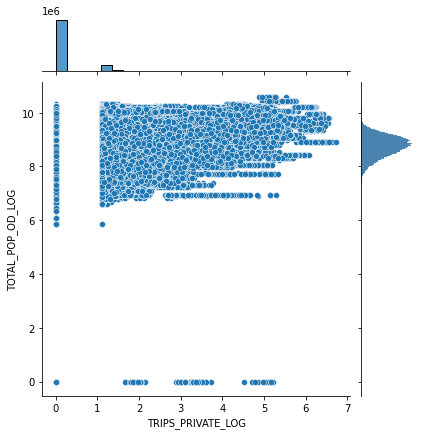

In [49]:
sns.jointplot(x = df['TRIPS_PRIVATE_LOG'], y = df['TOTAL_POP_OD_LOG'])

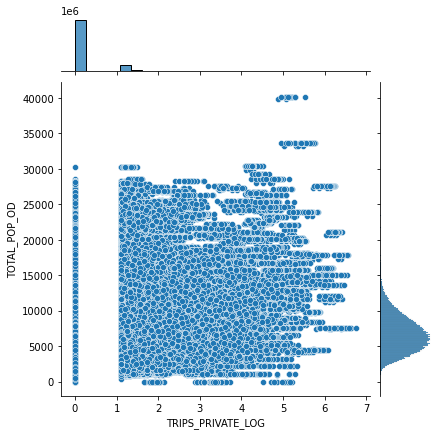

In [50]:
sns.jointplot(x = df['TRIPS_PRIVATE_LOG'], y = df['TOTAL_POP_OD'])

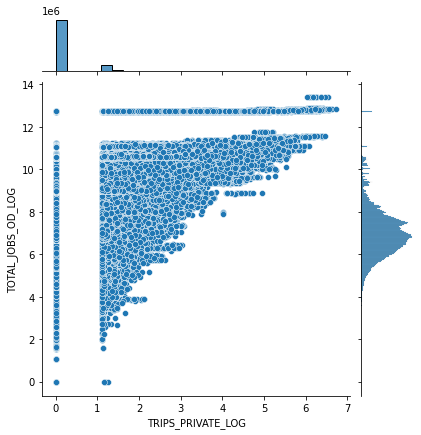

In [51]:
sns.jointplot(x = df['TRIPS_PRIVATE_LOG'], y = df['TOTAL_JOBS_OD_LOG'])

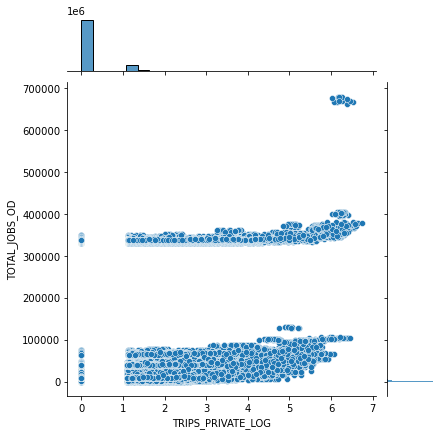

In [52]:
sns.jointplot(x = df['TRIPS_PRIVATE_LOG'], y = df['TOTAL_JOBS_OD'])

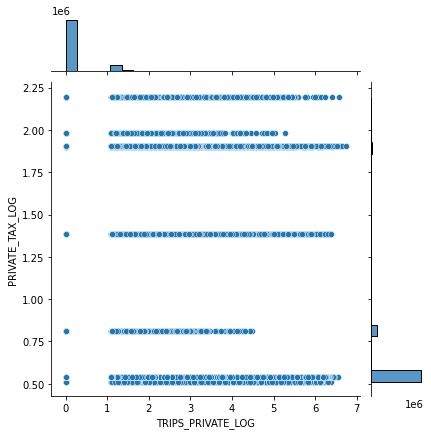

In [55]:
sns.jointplot(x = df['TRIPS_PRIVATE_LOG'], y = df['PRIVATE_TAX_LOG'])

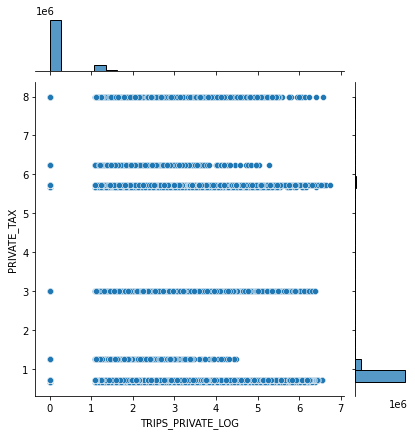

In [56]:
sns.jointplot(x = df['TRIPS_PRIVATE_LOG'], y = df['PRIVATE_TAX'])

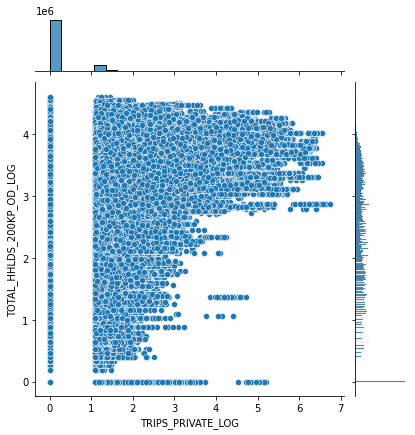

In [57]:
sns.jointplot(x = df['TRIPS_PRIVATE_LOG'], y = df['TOTAL_HHLDS_200KP_OD_LOG'])

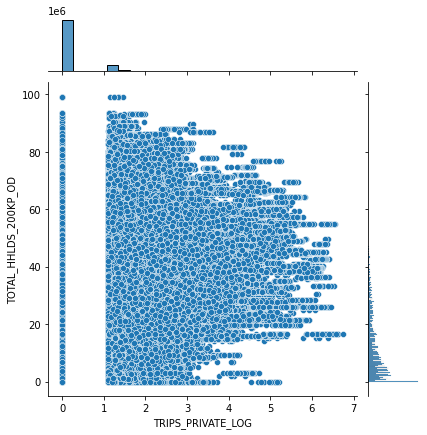

In [58]:
sns.jointplot(x = df['TRIPS_PRIVATE_LOG'], y = df['TOTAL_HHLDS_200KP_OD'])

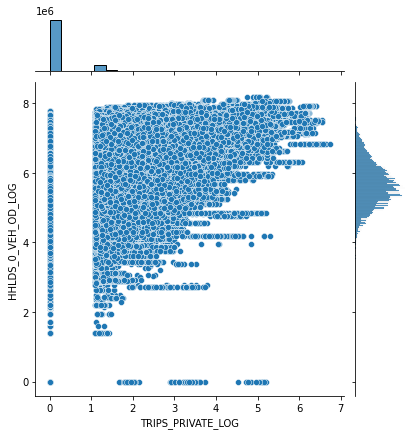

In [59]:
sns.jointplot(x = df['TRIPS_PRIVATE_LOG'], y = df['HHLDS_0_VEH_OD_LOG'])

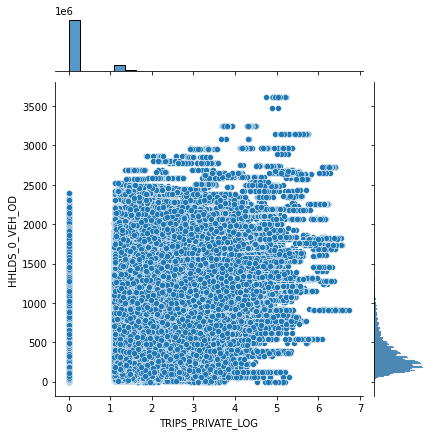

In [60]:
sns.jointplot(x = df['TRIPS_PRIVATE_LOG'], y = df['HHLDS_0_VEH_OD'])

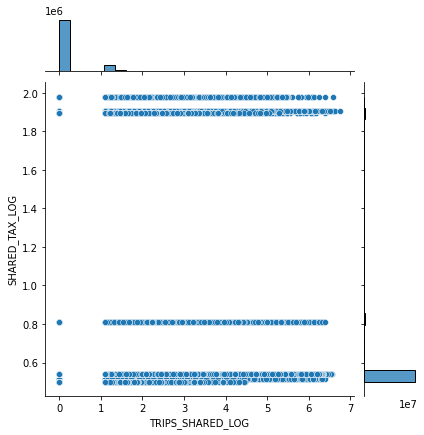

In [68]:
sns.jointplot(x = df['TRIPS_SHARED_LOG'], y = df['SHARED_TAX_LOG'])

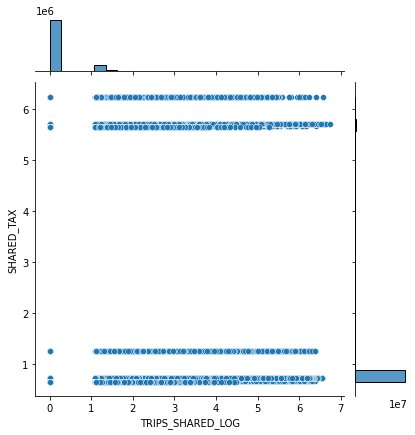

In [69]:
sns.jointplot(x = df['TRIPS_SHARED_LOG'], y = df['SHARED_TAX'])

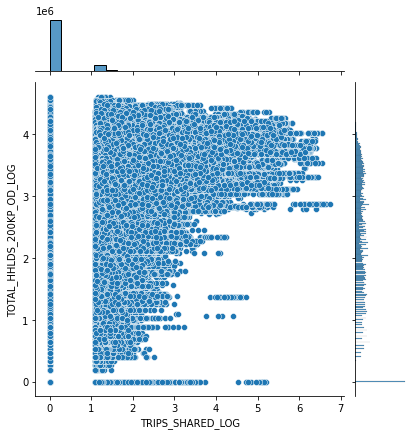

In [70]:
sns.jointplot(x = df['TRIPS_SHARED_LOG'], y = df['TOTAL_HHLDS_200KP_OD_LOG'])

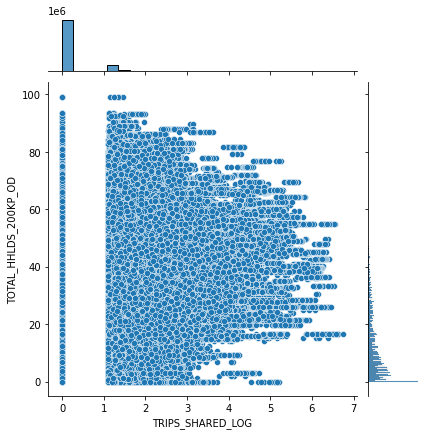

In [71]:
sns.jointplot(x = df['TRIPS_SHARED_LOG'], y = df['TOTAL_HHLDS_200KP_OD'])

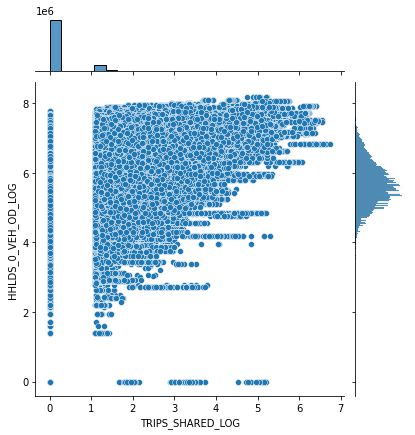

In [72]:
sns.jointplot(x = df['TRIPS_SHARED_LOG'], y = df['HHLDS_0_VEH_OD_LOG'])

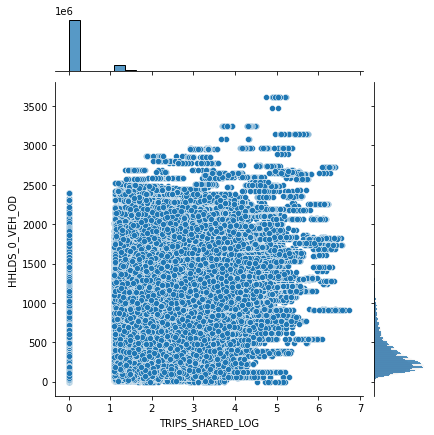

In [73]:
sns.jointplot(x = df['TRIPS_SHARED_LOG'], y = df['HHLDS_0_VEH_OD'])

In [74]:
residuals = pd.DataFrame(panel_ols_res.resids)

residuals = residuals.unstack(level = -1)
residuals.head()

residual                                   \
TIME                        2018-11-01 2018-12-01 2019-01-01 2019-02-01   
ENTITY                                                                    
17031010100.0_17031010100.0  -0.082505   0.133024   0.143785   0.166763   
17031010100.0_17031010201.0  -0.117384   0.081630   0.070408   0.065948   
17031010100.0_17031010202.0  -0.142519  -0.057227   0.274986   0.042197   
17031010100.0_17031010300.0   0.119084  -0.005357   0.251990   0.269158   
17031010100.0_17031010400.0  -0.058678  -0.004676   0.101096   0.143366   

                                                                         \
TIME                        2019-03-01 2019-04-01 2019-05-01 2019-06-01   
ENTITY                                                                    
17031010100.0_17031010100.0   0.195733   0.055822   0.076277  -0.158142   
17031010100.0_17031010201.0   0.097299   0.037855  -0.056909  -0.060852   
17031010100.0_17031010202.0   0.067269  -0.018004  -0.033087  -0.078974   
17031010100.0_17031010300.0   0.177137  -0.014571  -0.011724   0.039357   
17031010100.0_17031010400.0   0.125337   0.004224  -0.064286  -0.055869   

                                                                         \
TIME                        2019-07-01 2019-08-01 2019-09-01 2019-10-01   
ENTITY                                                                    
17031010100.0_17031010100.0  -0.138381  -0.153144  -0.032519  -0.166616   
17031010100.0_17031010201.0   0.037706  -0.138723  -0.125851   0.017243   
17031010100.0_17031010202.0  -0.032475  -0.064772   0.011201  -0.082808   
17031010100.0_17031010300.0   0.094999  -0.002977  -0.011668  -1.313359   
17031010100.0_17031010400.0  -0.083122  -0.138223  -0.034546   0.028482   

                                                                         
TIME                        2019-11-01 2019-12-01 2020-01-01 2020-02-01  
ENTITY                                                                   
17031010100.0_17031010100.0  -0.049930  -0.115640  -0.052174   0.177646  
17031010100.0_17031010201.0   0.002822   0.080520   0.008237   0.000051  
17031010100.0_17031010202.0   0.099932   0.030846  -0.107283   0.090717  
17031010100.0_17031010300.0   0.200553  -0.001999   0.119109   0.090266  
17031010100.0_17031010400.0  -0.037788   0.101777  -0.101765   0.074669

In [75]:
residuals.columns = residuals.columns.droplevel()
residuals.head()

TIME,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
ENTITY,,,,,,,,,,,,,,,,
17031010100.0_17031010100.0,-0.082505,0.133024,0.143785,0.166763,0.195733,0.055822,0.076277,-0.158142,-0.138381,-0.153144,-0.032519,-0.166616,-0.049930,-0.115640,-0.052174,0.177646
17031010100.0_17031010201.0,-0.117384,0.081630,0.070408,0.065948,0.097299,0.037855,-0.056909,-0.060852,0.037706,-0.138723,-0.125851,0.017243,0.002822,0.080520,0.008237,0.000051
17031010100.0_17031010202.0,-0.142519,-0.057227,0.274986,0.042197,0.067269,-0.018004,-0.033087,-0.078974,-0.032475,-0.064772,0.011201,-0.082808,0.099932,0.030846,-0.107283,0.090717
17031010100.0_17031010300.0,0.119084,-0.005357,0.251990,0.269158,0.177137,-0.014571,-0.011724,0.039357,0.094999,-0.002977,-0.011668,-1.313359,0.200553,-0.001999,0.119109,0.090266
17031010100.0_17031010400.0,-0.058678,-0.004676,0.101096,0.143366,0.125337,0.004224,-0.064286,-0.055869,-0.083122,-0.138223,-0.034546,0.028482,-0.037788,0.101777,-0.101765,0.074669


In [ ]:
len(residuals)

In [ ]:
len(df)

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2020-02-01 00:00:00', ylabel='Density'>

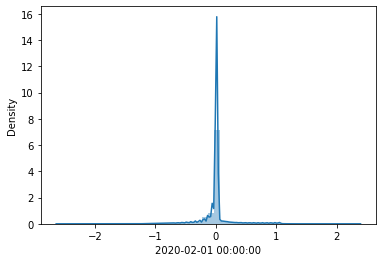

In [76]:
sns.distplot(residuals['2020-02-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2020-01-01 00:00:00', ylabel='Density'>

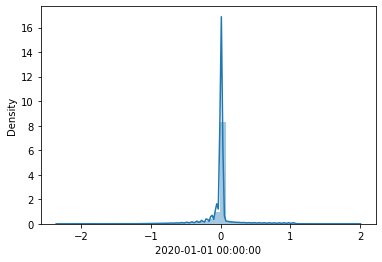

In [77]:
sns.distplot(residuals['2020-01-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2020-01-01 00:00:00', ylabel='Density'>

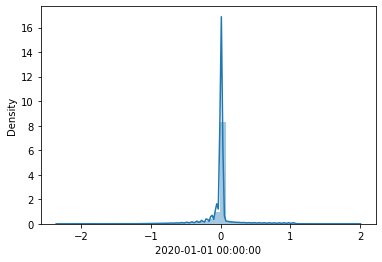

In [78]:
sns.distplot(residuals['2020-01-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2019-12-01 00:00:00', ylabel='Density'>

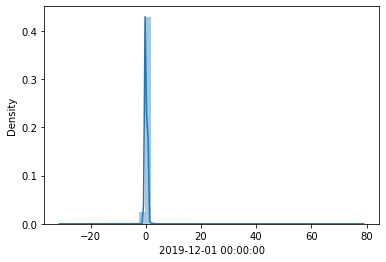

In [61]:
sns.distplot(residuals['2019-12-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2019-11-01 00:00:00', ylabel='Density'>

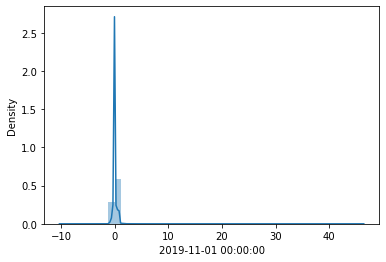

In [62]:
sns.distplot(residuals['2019-11-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2019-11-01 00:00:00', ylabel='Density'>

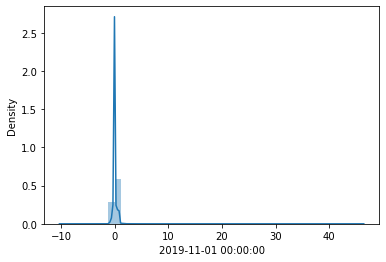

In [63]:
sns.distplot(residuals['2019-11-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2019-10-01 00:00:00', ylabel='Density'>

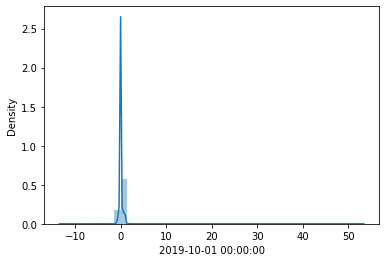

In [64]:
sns.distplot(residuals['2019-10-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2019-09-01 00:00:00', ylabel='Density'>

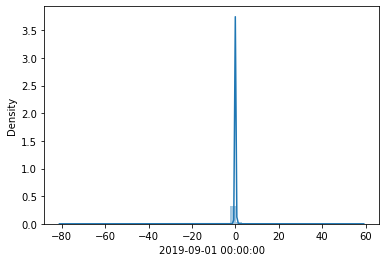

In [65]:
sns.distplot(residuals['2019-09-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2019-08-01 00:00:00', ylabel='Density'>

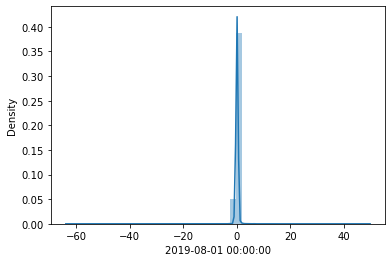

In [66]:
sns.distplot(residuals['2019-08-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2019-07-01 00:00:00', ylabel='Density'>

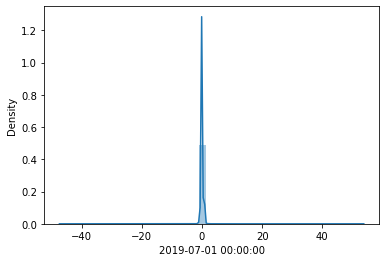

In [67]:
sns.distplot(residuals['2019-07-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2019-06-01 00:00:00', ylabel='Density'>

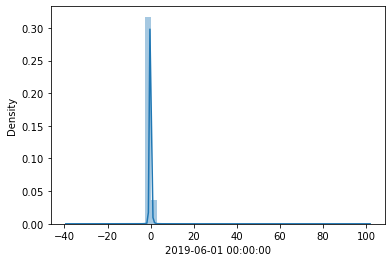

In [68]:
sns.distplot(residuals['2019-06-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2019-05-01 00:00:00', ylabel='Density'>

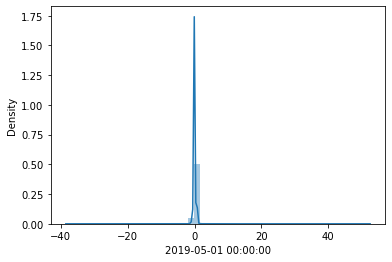

In [69]:
sns.distplot(residuals['2019-05-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2019-04-01 00:00:00', ylabel='Density'>

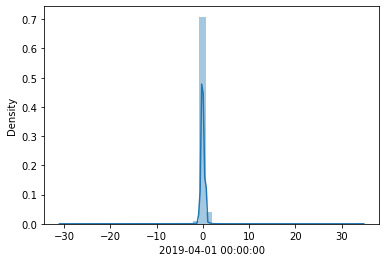

In [70]:
sns.distplot(residuals['2019-04-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2019-03-01 00:00:00', ylabel='Density'>

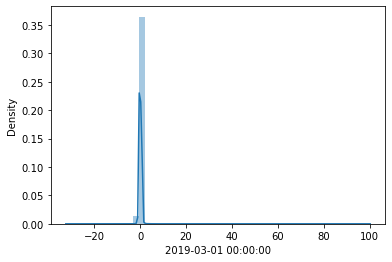

In [71]:
sns.distplot(residuals['2019-03-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2019-02-01 00:00:00', ylabel='Density'>

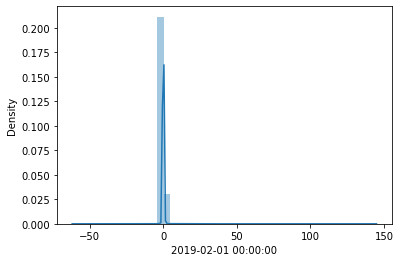

In [72]:
sns.distplot(residuals['2019-02-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2019-01-01 00:00:00', ylabel='Density'>

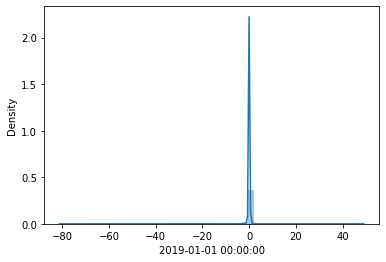

In [73]:
sns.distplot(residuals['2019-01-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2018-12-01 00:00:00', ylabel='Density'>

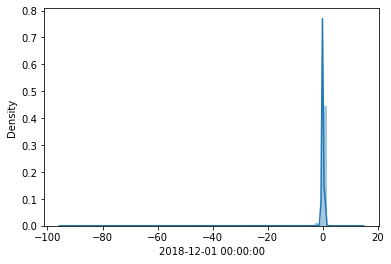

In [74]:
sns.distplot(residuals['2018-12-01'])

C:\Users\transportlab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2018-11-01 00:00:00', ylabel='Density'>

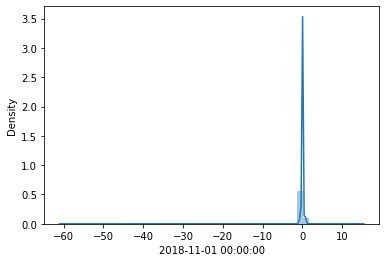

In [75]:
sns.distplot(residuals['2018-11-01'])

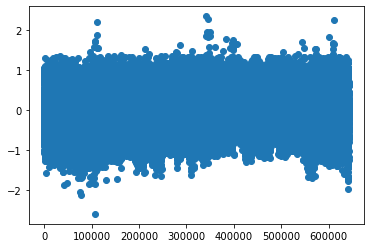

In [79]:

residual = pd.DataFrame()
residual['residual'] = residuals['2020-02-01']
residual.index = range(0,len(residual))
plt.scatter(residual.index,residual.residual)


In [78]:
#census tract 17031833000 is the downtown loop and census tract 17031839100 is west of the dowtown loop where a lot of night life is

residuals[residuals['2020-02-01']>50]

TIME,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
ENTITY,,,,,,,,,,,,,,,,
17031833000.0_17031833000.0,-27.443946,-18.248996,-4.561843,32.570863,17.615864,-12.085133,-11.309059,-16.763684,-23.431311,-27.737099,-27.497509,-3.552562,35.927591,12.621068,5.636894,68.258862
17031833000.0_17031839100.0,-41.348850,-65.396755,-69.435560,19.673081,18.330443,-9.471293,8.718835,20.053971,5.797362,12.985627,-9.582639,46.683603,2.372938,15.062971,-19.217387,64.773654
17031839100.0_17031081700.0,-18.194880,-11.990657,-18.158511,45.858024,51.949615,-5.002513,-22.997625,-28.875857,-33.424819,-23.288438,-41.775138,6.961033,26.741486,28.630201,-6.974314,50.542395
17031839100.0_17031833000.0,-47.208875,-56.435727,-81.152480,-0.572696,9.533864,-30.947975,1.651508,28.261174,8.254037,34.183208,-14.755734,37.451531,18.563060,38.174577,-5.321478,60.322008
17031839100.0_17031839100.0,-60.994042,-77.323086,48.949595,144.818347,98.063771,2.168451,-30.710329,-27.977380,-37.954704,-63.900021,-80.939120,12.181932,25.105457,-12.964453,-18.871898,80.347479


In [79]:
#census tract 17031081401 is just north of downtown... a high income area
#census tract 17031320100 is just east of the downtown loop and census tract 17031330100 is just south of the downtown zone
residuals[residuals['2020-02-01']< -30]

TIME,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
ENTITY,,,,,,,,,,,,,,,,
17031081401.0_17031839100.0,-7.984013,-54.442077,-50.788623,1.333042,32.118876,29.085901,33.156897,38.382281,7.976701,21.688843,3.705507,44.548843,10.941776,-26.588916,-52.609051,-30.525987
17031320100.0_17031330100.0,-25.145087,-69.870685,-78.667249,-61.763873,-27.732045,26.710861,42.414310,101.737256,33.468815,36.548810,50.398735,19.044259,-4.815247,26.263304,-30.133947,-38.458216


In [80]:
#the model underpredicts ridership for census tract 17031839100 here too but also does for census tract 17031081800 (river north)
residuals[residuals['2019-02-01']>50]

TIME,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
ENTITY,,,,,,,,,,,,,,,,
17031081700.0_17031839100.0,-34.520577,-69.318397,-13.122494,58.680934,83.784262,15.532007,7.705731,-21.356887,-38.432056,-25.838808,-48.823582,35.801384,11.117110,8.727032,-15.934565,45.998907
17031081800.0_17031081800.0,1.364402,0.391441,30.608663,51.069441,43.699049,4.095615,-10.494212,-18.533951,-27.638909,-30.775118,-34.455708,-13.440477,4.951689,-2.008973,-5.848269,7.015317
17031081800.0_17031839100.0,-1.555823,-34.462798,39.647834,104.733230,100.014252,34.738037,-16.453960,-39.255077,-38.000335,-23.512415,-55.853091,16.991087,-4.430118,-29.325676,-58.430957,5.155808
17031280100.0_17031839100.0,-29.639722,-36.007791,19.229599,63.862111,54.093600,5.275027,-20.182323,-16.984789,-25.947288,-34.582227,-44.896831,26.290681,22.794612,14.076557,-25.125316,27.744101
17031839100.0_17031081800.0,-15.591083,-20.552635,27.699826,53.605909,44.804285,10.949292,-19.854582,-6.460102,-41.339328,-21.953325,-37.553416,7.321683,9.481824,-9.267964,-13.065491,31.775108
17031839100.0_17031280100.0,-11.579368,-15.950853,20.845004,51.651725,24.731134,-8.377187,-21.846873,-12.499948,-21.241514,-14.823307,-30.364758,18.576889,11.807982,-0.531303,-14.589761,24.192137
17031839100.0_17031839100.0,-60.994042,-77.323086,48.949595,144.818347,98.063771,2.168451,-30.710329,-27.977380,-37.954704,-63.900021,-80.939120,12.181932,25.105457,-12.964453,-18.871898,80.347479


In [81]:
# census tract 17031330100 has ridership to/from it over-predicted here and is a census tract just south of the downtown zone
residuals[residuals['2019-02-01']<-30]

TIME,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
ENTITY,,,,,,,,,,,,,,,,
17031081403.0_17031330100.0,-11.407547,-42.588170,-51.756541,-38.555463,-4.479366,23.957356,17.215163,52.236409,19.446279,18.789356,24.862532,18.367696,-2.036142,16.446813,-16.199317,-24.299060
17031081500.0_17031330100.0,-6.964971,-50.232660,-62.838977,-35.789064,-9.166430,26.233438,19.454276,50.515697,1.441671,14.613049,29.462741,7.053508,5.163825,34.211987,-8.995254,-14.162834
17031320100.0_17031330100.0,-25.145087,-69.870685,-78.667249,-61.763873,-27.732045,26.710861,42.414310,101.737256,33.468815,36.548810,50.398735,19.044259,-4.815247,26.263304,-30.133947,-38.458216
17031320600.0_17031330100.0,-29.427383,-42.896103,-36.767860,-32.897009,-29.838715,5.861714,17.799277,78.323537,1.495675,4.506116,51.771515,20.294211,14.992261,14.909489,-21.377938,-16.748787
17031330100.0_17031081403.0,-9.452413,-25.051109,-38.477564,-31.643425,-3.634686,14.092950,15.320505,21.966205,22.932061,15.709836,15.221056,19.732588,3.042104,8.967465,-15.550094,-13.175480
17031330100.0_17031320100.0,-34.093987,-61.153267,-72.233719,-38.493888,-4.965251,12.824307,35.341866,60.201109,53.670349,43.251770,26.630573,29.707104,-6.341572,9.032783,-28.992567,-24.385611
17031839100.0_17031330100.0,-33.867678,-71.199995,-67.914158,-35.963461,-11.250099,-6.919439,27.278226,91.328872,17.880149,49.769038,22.687617,23.556747,-6.206263,36.985844,-27.581644,-8.583757


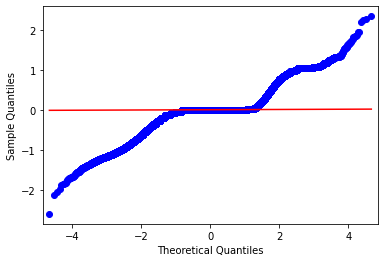

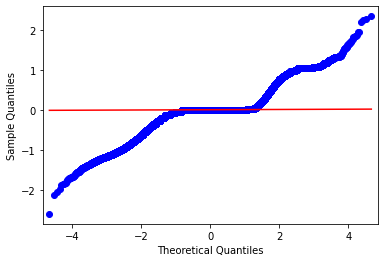

In [80]:
smf.graphics.qqplot(residuals['2020-02-01'],line = 'q')

In [91]:
panel_ols_res.params

TOTAL_POP_OD            0.000060
TOTAL_JOBS_OD           0.000150
PRIVATE_TAX            -0.003427
TOTAL_HHLDS_200KP_OD    0.004474
HHLDS_0_VEH_OD          0.000901
travel_time            -0.000014
Name: parameter, dtype: float64

In [92]:
df2 = df[['TOTAL_POP_OD','TOTAL_JOBS_OD','PRIVATE_TAX','TOTAL_HHLDS_200KP_OD','HHLDS_0_VEH_OD','travel_time']]

MemoryError: Unable to allocate 20.4 GiB for an array with shape (267, 10265616) and data type float64

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = vif_df.columns
vif

In [ ]:
effects = panel_ols_res.estimated_effects
effects = effects.unstack()

In [19]:
df['TRIPS_PRIVATE_LOG'] = np.log(1+ df['TRIPS_PRIVATE'])

In [20]:
df['PRIVATE_TAX_LOG'] = np.log(1+ df['PRIVATE_TAX'])

In [ ]:
#start with a basic model with dependent variable log transformed 

mod = PanelOLS.from_formula("TRIPS_PRIVATE_LOG \
                       ~ TOTAL_POP_OD \
                       + TOTAL_JOBS_OD \
                       + PRIVATE_TAX_LOG \
                       + TOTAL_HHLDS_100K_PLUS_OD \
                       + HHLDS_0_VEH_OD \
                       + travel_time \
                       + EntityEffects ",
             data = df)

panel_ols_res = mod.fit()
print(panel_ols_res)